# Treinamento dos modelos de Machine Learning

## Modelos Supervisionados - Classificação
Vamos treinar 11 algorítmos diferentes:
- Naive Bayes (Gaussiano)
- Regressão Logística
- Decision Tree
- Random Forest
- Gradient Boosting
- k-Nearest Neighbors
- Perceptron
- Support Vector Machines - SVM
- Rede Neural (MLP)
- Stacking
- Blending

#### Importando Bibliotecas necessárias

In [1]:

import pandas as pd

#### Lendo ABT tratada

In [2]:
abt = pd.read_csv('DFimputado.csv')

abt.shape

(33287, 26)

In [3]:
abt.head()

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS,target
0,5008804,15,13.0,0.866667,M,Y,Y,0.0,427500.0,Working,...,0.0,0.0,Laborers,2.0,09/04/1990,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1
1,5008804,15,13.0,0.866667,F,N,Y,1.0,90000.0,State servant,...,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1
2,5008805,14,12.0,0.857143,M,Y,Y,0.0,427500.0,Working,...,0.0,0.0,Laborers,2.0,09/04/1990,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1
3,5008805,14,12.0,0.857143,M,N,Y,0.0,180000.0,Working,...,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1
4,5008806,14,7.0,0.500000,M,Y,Y,0.0,112500.0,Working,...,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806,"72701, AR, 218 Shipley Alley",0


In [11]:
abt.replace({'FLAG_OWN_REALTY':{'N': 0, 'Y':1}, 'FLAG_OWN_CAR':{'N':0, 'Y':1}, 'CODE_GENDER':{'M':0, 'F':1}}, inplace=True)

In [ ]:
abt.pget_dummy()

### Ajuste ideal dos algorítmos

### Para minimizar o risco do Overfitting

In [210]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/holdout.PNG", width=800, height=800)

### Holdout: vamos gerar 2 tabelas: treino e teste
(A tabela de validação, utilizada para convergência e ajuste dos modelos é gerada automaticamente pelos algorítmos)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
from sklearn.model_selection import train_test_split

explicativas = abt.drop(['target'], axis=1)
resposta = abt["target"]

x_train, x_test, y_train, y_test = train_test_split(explicativas, resposta, test_size = 0.3, random_state = 0)

In [21]:
# Vamos verificar quantidade de linhas e colunas das tabelas geradas:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((23300, 25), (9987, 25), (23300,), (9987,))

In [22]:
x_train.head()

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
477,5009232,36,35.000000,0.972222,1,1,0,0.0,225000.0,Working,...,1.0,0.0,0.0,Managers,2.0,25/12/1982,C,5009232,5009232,"72703, AR, 1189 Northwest End Avenue"
26331,5117247,12,18.344839,0.655111,1,0,1,2.0,112500.0,Working,...,0.0,0.0,0.0,Laborers,4.0,14/08/1987,C,5117247,5117247,"901 North Lincoln Boulevard, 73104, OK"
5140,5026645,4,18.344839,0.655111,0,1,0,0.0,135000.0,Working,...,1.0,0.0,0.0,Laborers,1.0,30/10/1973,M,5026645,5026645,"104 Lakeridge Drive, 32405, FL"
4066,5024304,1,18.344839,0.655111,0,1,1,0.0,202500.0,Commercial associate,...,0.0,0.0,0.0,Drivers,1.0,10/04/2000,R,5024304,5024304,"20011, DC, 702 Farragut Street Northwest"
31771,5146283,40,25.000000,0.625000,1,0,1,0.0,180000.0,State servant,...,1.0,0.0,0.0,Core staff,2.0,31/01/1979,P,5146283,5146283,"99503, AK, 3901 Old Seward Highway"


In [18]:
abt.replace({'FLAG_OWN_REALTY':{'N': 0, 'Y':1}, 'FLAG_OWN_CAR':{'N':0, 'Y':1}, 'CODE_GENDER':{'M':0, 'F':1}}, inplace=True)

Index(['ID', 'count', 'Paid', 'Ratio', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'DAYS_BIRTH_CLEAN', 'Letter', 'Main_ID', 'New_ID', 'ADDRESS', 'target'],
      dtype='object')

In [23]:
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0,  
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=-1, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)

rndforest.fit(x_train, y_train)

# Treino
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Teste
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

ValueError: could not convert string to float: 'Working'

## Modelo 1) Naive Bayes Gaussiano
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

É uma técnica de classificação baseado no teorema de Bayes com uma suposição de independência entre os preditores. Em termos simples, um classificador Naive Bayes assume que a presença de uma característica particular em uma classe não está relacionada com a presença de qualquer outro recurso. Por exemplo, um fruto pode ser considerado como uma maçã se é vermelho, redondo, e tiver cerca de 3 polegadas de diâmetro. Mesmo que esses recursos dependam uns dos outros ou da existência de outras características, todas estas propriedades contribuem de forma independente para a probabilidade de que este fruto é uma maçã e é por isso que é conhecido como ‘Naive’ (ingênuo).

In [214]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/gaussian_nb.jpg", width=700, height=700)

#### Treinamento

In [215]:
# 1) Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)


# Treino
y_pred_gaussian_train = gaussian.predict(x_train)
y_score_gaussian_train = gaussian.predict_proba(x_train)

# Teste
y_pred_gaussian_test = gaussian.predict(x_test)
y_score_gaussian_test = gaussian.predict_proba(x_test)

#### Validação

In [216]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/metricas_desemp.png", width=350, height=350)

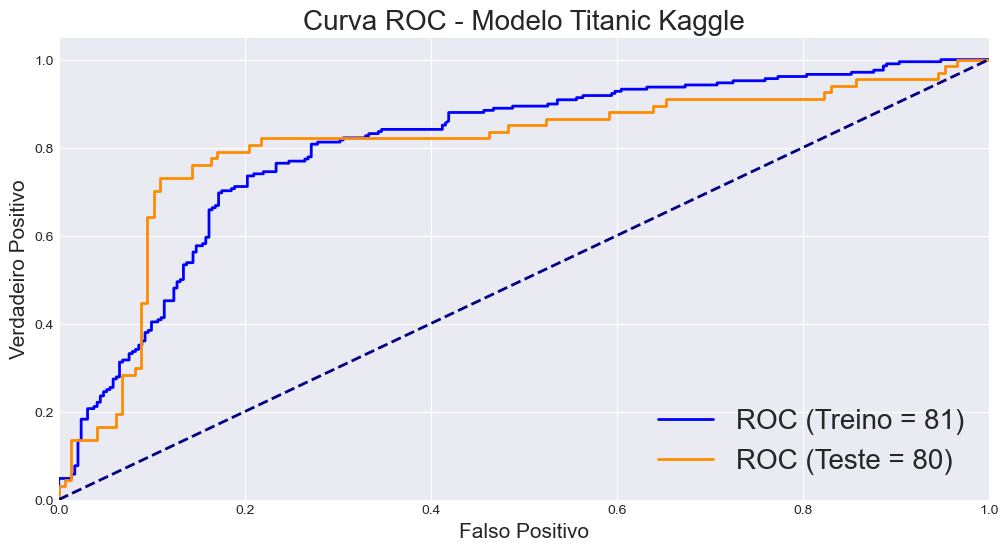

Acurácia, Gini e Área Curva ROC (Base de Treino):  66.93 62.0 81.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  71.96 60.0 80.0


In [217]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_gaussian_train = round(accuracy_score(y_pred_gaussian_train, y_train) * 100, 2)

#Teste
acc_gaussian_test = round(accuracy_score(y_pred_gaussian_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_gaussian_train, tpr_gaussian_train, thresholds = roc_curve(y_train, y_score_gaussian_train[:,1])
roc_auc_gaussian_train = 100*round(auc(fpr_gaussian_train, tpr_gaussian_train), 2)
gini_gaussian_train = 100*round((2*roc_auc_gaussian_train/100 - 1), 2)

# Teste
fpr_gaussian_test, tpr_gaussian_test, thresholds = roc_curve(y_test, y_score_gaussian_test[:,1])
roc_auc_gaussian_test = 100*round(auc(fpr_gaussian_test, tpr_gaussian_test), 2)
gini_gaussian_test = 100*round((2*roc_auc_gaussian_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_gaussian_train, tpr_gaussian_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_gaussian_train)
plt.plot(fpr_gaussian_test, tpr_gaussian_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_gaussian_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_gaussian_train, gini_gaussian_train, roc_auc_gaussian_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_gaussian_test, gini_gaussian_test, roc_auc_gaussian_test)

## Modelo 2) Regressão Logística
É uma técnica recomendada para situações em que a variável dependente é de natureza dicotômica ou binária. Quanto às independentes, tanto podem ser categóricas ou não.

Uma vez que as variáveis independentes são de natureza numérica (interval/ordinal) devemos verificar a linearidade entre a variável independente e a log(odds).

Para o desenvolvimento deste modelo estamos considerando que todas independentes satisfazem tal condição.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [218]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/logistic_reg.png", width=500, height=500)


In [219]:
# 2) Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', 
                            dual=False, 
                            tol=0.0001, 
                            C=1, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=None, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1)
logreg.fit(x_train, y_train)


# Treino
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

# Teste
y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [220]:
xvars = abt.drop('target',axis=1)

In [221]:
abt['Score']=logreg.predict_proba(xvars)[:,0]
abt.to_csv('/Users/zaninth/Desktop/POD academy/codigos/ABT_Titanic_Scored_RL_ML.csv')
abt.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISS,Embarked_Q,Embarked_S,LE_Cabin,LE_Ticket,target,Score
0,0.842652,-2.776494e-16,-0.477887,-0.475273,-0.331516,1,0,1,0,125,370,0,0.826651
1,0.842652,6.678714e-01,0.404842,5.776939,-0.024090,0,0,0,1,125,270,1,0.828652
2,0.842652,3.943417e-01,-0.477887,-0.475273,-0.506878,1,0,0,0,125,175,0,0.848561
3,-1.541517,-2.776494e-16,-0.477887,-0.475273,3.660027,1,0,0,1,77,481,0,0.408754
4,-0.349433,-4.262476e-01,-0.477887,2.025611,-0.350867,0,0,0,1,125,143,1,0.229506


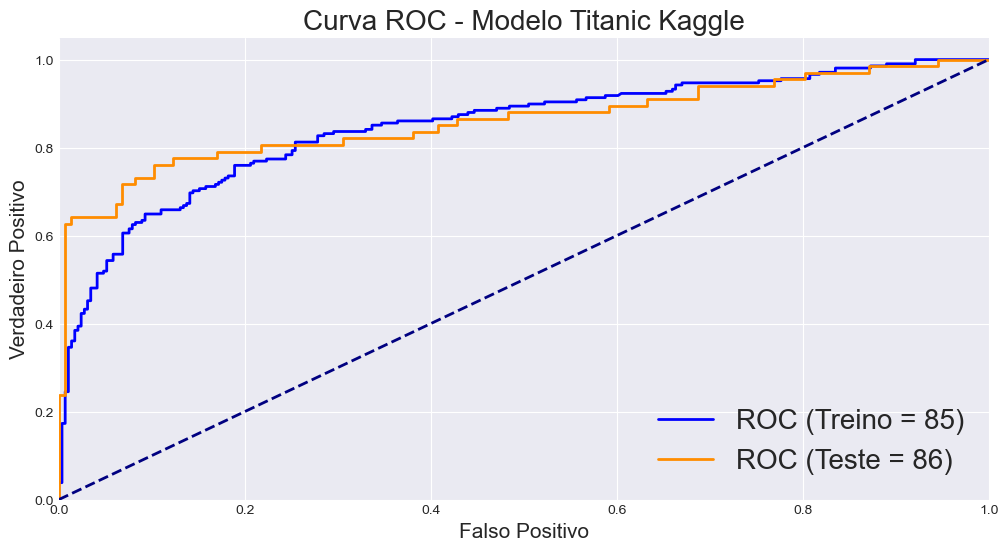

Acurácia, Gini e Área Curva ROC (Base de Treino):  78.76 70.0 85.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  84.58 72.0 86.0


In [222]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 2)

#Teste
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 2)
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 2)

# Teste
fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 2)
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_logreg_train)
plt.plot(fpr_logreg_test, tpr_logreg_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_logreg_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_logreg_train, gini_logreg_train, roc_auc_logreg_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_logreg_test, gini_logreg_test, roc_auc_logreg_test)

# Modelo 3) Support Vector Machines - SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

O que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

In [223]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/svm_hiperp.png", width=400, height=400)

In [224]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/SVM_kernel.png", width=800, height=800)

#### Treinamento do modelo

In [225]:
# 3) Support Vector Machines
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=1.0, 
          kernel='poly', 
          degree=3, 
          gamma='scale', 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None)

svc.fit(x_train, y_train)

# Treino
y_pred_svc_train = svc.predict(x_train)
#Converte para probabilidade
y_score_svc_train = 1/(1+np.exp(-svc.decision_function(x_train)))

# Teste
y_pred_svc_test = svc.predict(x_test)
#Converte para probabilidade
y_score_svc_test = 1/(1+np.exp(-svc.decision_function(x_test)))

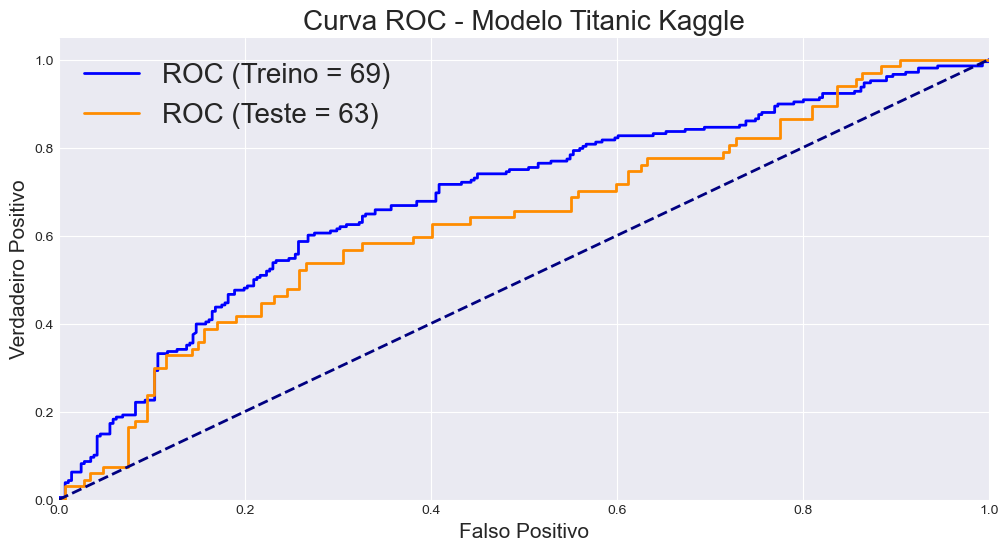

Acurácia, Gini e Área Curva ROC (Base de Treino):  62.32 38.0 69.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  68.69 26.0 63.0


In [226]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_svc_train = round(accuracy_score(y_pred_svc_train, y_train) * 100, 2)

#Teste
acc_svc_test = round(accuracy_score(y_pred_svc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_svc_train, tpr_svc_train, thresholds = roc_curve(y_train, y_score_svc_train)
roc_auc_svc_train = 100*round(auc(fpr_svc_train, tpr_svc_train), 2)
gini_svc_train = 100*round((2*roc_auc_svc_train/100 - 1), 2)

# Teste
fpr_svc_test, tpr_svc_test, thresholds = roc_curve(y_test, y_score_svc_test)
roc_auc_svc_test = 100*round(auc(fpr_svc_test, tpr_svc_test), 2)
gini_svc_test = 100*round((2*roc_auc_svc_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_svc_train, tpr_svc_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_svc_train)
plt.plot(fpr_svc_test, tpr_svc_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_svc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_svc_train, gini_svc_train, roc_auc_svc_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_svc_test, gini_svc_test, roc_auc_svc_test)

## Modelo 4) Decision Tree
https://scikit-learn.org/stable/modules/tree.html

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios. Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente.

In [227]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/arvore_ex01.png", width=1000, height=1000)

In [228]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=3, 
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None, 
                                 random_state=None, 
                                 max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0,  
                                 class_weight=None)
dectree.fit(x_train, y_train)


# Treino
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

# Teste
y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]

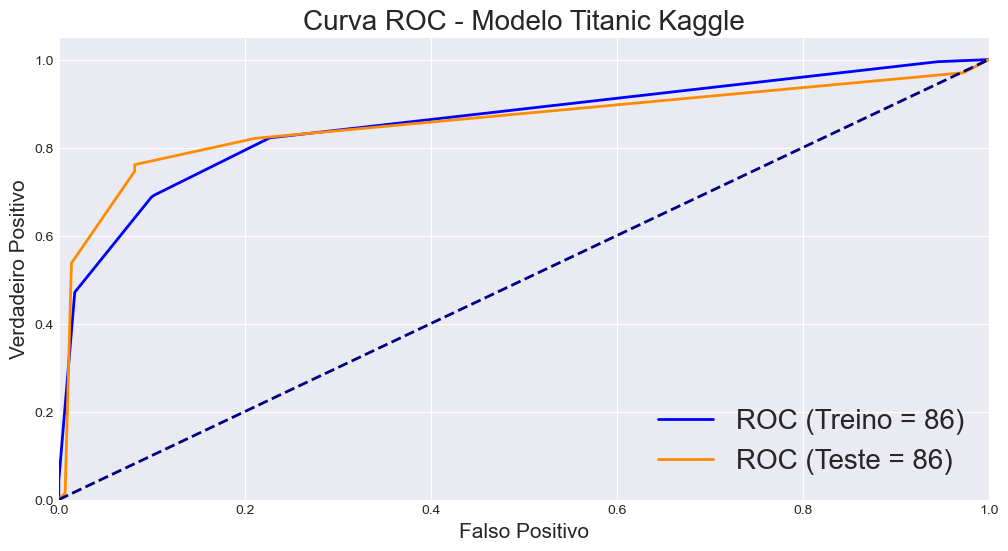

Acurácia, Gini e Área Curva ROC (Base de Treino):  81.16 72.0 86.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  86.45 72.0 86.0


In [229]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 2)

#Teste
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)

# Teste
fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_dectree_train, tpr_dectree_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_dectree_train)
plt.plot(fpr_dectree_test, tpr_dectree_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_dectree_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_dectree_train, gini_dectree_train, roc_auc_dectree_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_dectree_test, gini_dectree_test, roc_auc_dectree_test)

### Visualizando a árvore construída
Visualizando a árvore construída

[Text(0.5, 0.875, '#0\nSex_male <= 0.5\n100.0%\n[0.583, 0.417]'),
 Text(0.25, 0.625, '#1\nPclass <= 0.247\n36.5%\n[0.253, 0.747]'),
 Text(0.125, 0.375, '#2\nAge <= -2.028\n19.2%\n[0.062, 0.938]'),
 Text(0.0625, 0.125, '#3\n0.4%\n[0.5, 0.5]'),
 Text(0.1875, 0.125, '#4\n18.8%\n[0.053, 0.947]'),
 Text(0.375, 0.375, '#5\nFare <= -0.18\n17.2%\n[0.465, 0.535]'),
 Text(0.3125, 0.125, '#6\n13.8%\n[0.348, 0.652]'),
 Text(0.4375, 0.125, '#7\n3.4%\n[0.941, 0.059]'),
 Text(0.75, 0.625, '#8\nLE_Cabin <= 124.0\n63.5%\n[0.773, 0.227]'),
 Text(0.625, 0.375, '#9\nAge <= -0.934\n13.6%\n[0.529, 0.471]'),
 Text(0.5625, 0.125, '#10\n1.0%\n[0.0, 1.0]'),
 Text(0.6875, 0.125, '#11\n12.6%\n[0.571, 0.429]'),
 Text(0.875, 0.375, '#12\nAge <= -2.185\n49.9%\n[0.839, 0.161]'),
 Text(0.8125, 0.125, '#13\n0.8%\n[0.0, 1.0]'),
 Text(0.9375, 0.125, '#14\n49.1%\n[0.853, 0.147]')]

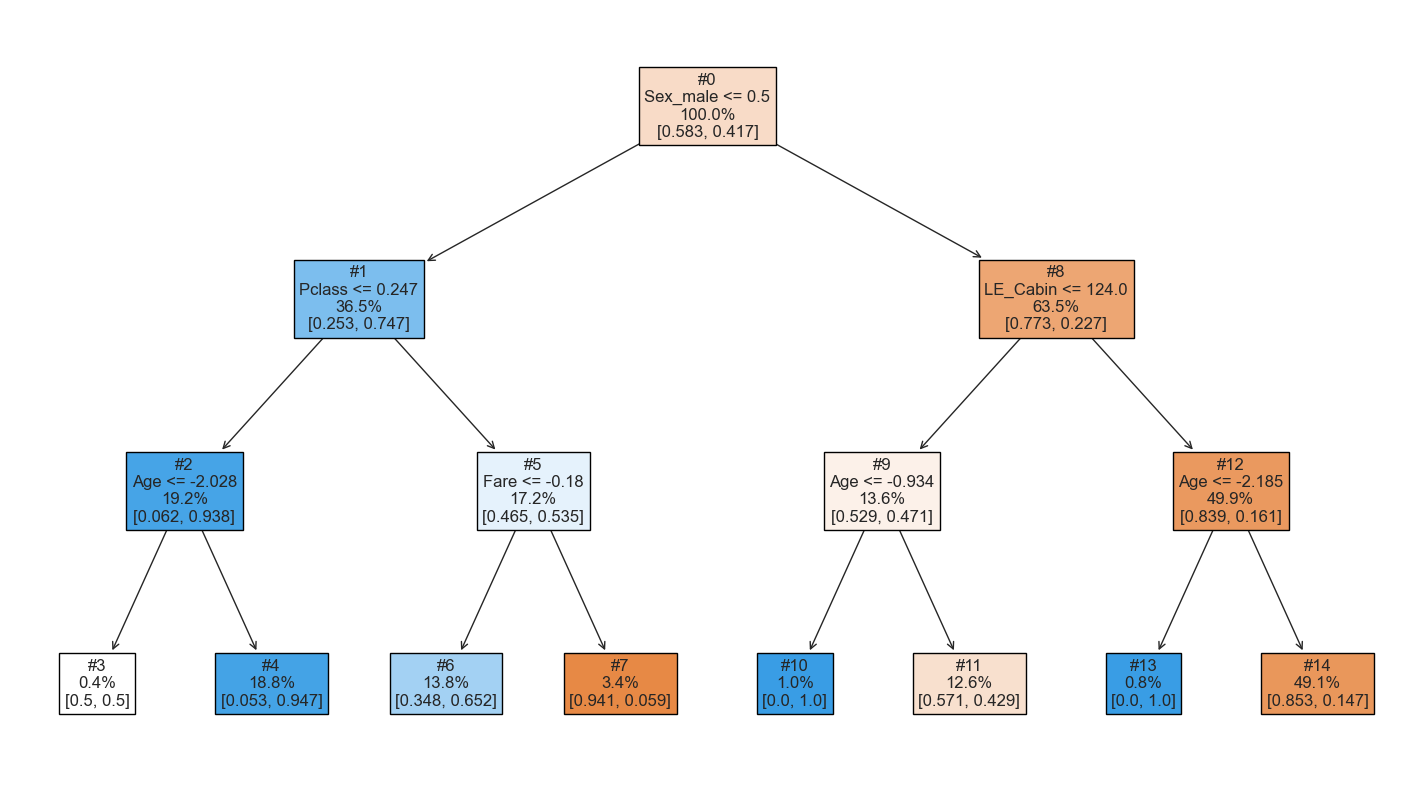

In [230]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 10), dpi=100, facecolor='w', edgecolor='k')

import sklearn
sklearn.tree.plot_tree(dectree, 
                       max_depth=10, 
                       feature_names=x_train.columns, 
                       class_names=None, 
                       label='Plotando Árvore', 
                       filled=True, 
                       impurity=False, 
                       node_ids=True, 
                       proportion=True, 
                       rounded=False, 
                       precision=3, 
                       ax=None, 
                       fontsize=12)


# Modelo 5) Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [231]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/random_forest_01.png", width=800, height=800)

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0,  
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=-1, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)

rndforest.fit(x_train, y_train)

# Treino
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Teste
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

ValueError: could not convert string to float: 'F'

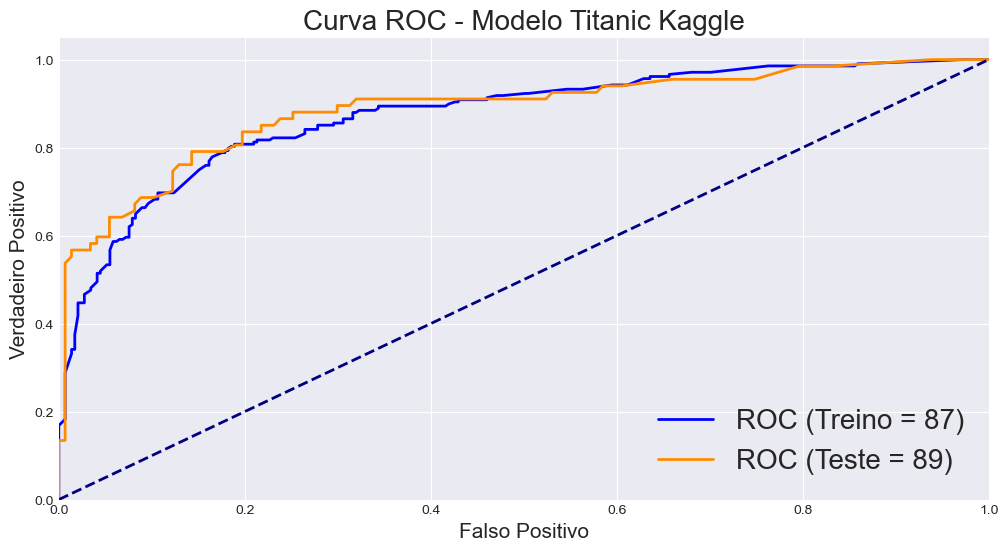

Acurácia, Gini e Área Curva ROC (Base de Treino):  77.35 74.0 87.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  84.58 78.0 89.0


In [233]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)

#Teste
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)

# Teste
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_rndforest_train, tpr_rndforest_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_rndforest_train)
plt.plot(fpr_rndforest_test, tpr_rndforest_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_rndforest_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_rndforest_train, gini_rndforest_train, roc_auc_rndforest_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_rndforest_test, gini_rndforest_test, roc_auc_rndforest_test)

## Modelo 6) Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [234]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/gradient_boosting_01.jpg", width=800, height=800)

## Diferença entre Bagging e Boosting

In [235]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/bagging_boosting_01.png", width=800, height=800)

In [236]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1,
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse',
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0, 
                                 init=None, 
                                 random_state=None,
                                 max_features=None,
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 validation_fraction=0.2, 
                                 n_iter_no_change=None,
                                 tol=0.0001)

gbc.fit(x_train, y_train)

# Treino
y_pred_gbc_train = gbc.predict(x_train)
y_score_gbc_train = gbc.predict_proba(x_train)[:,1]

# Teste
y_pred_gbc_test = gbc.predict(x_test)
y_score_gbc_test = gbc.predict_proba(x_test)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


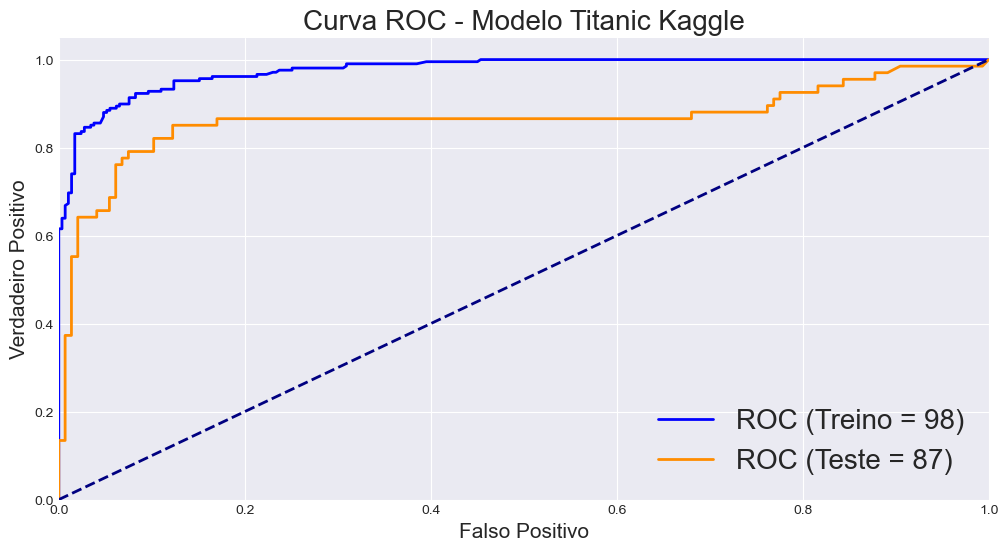

Acurácia, Gini e Área Curva ROC (Base de Treino):  91.98 96.0 98.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  86.92 74.0 87.0


In [237]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_gbc_train = round(accuracy_score(y_pred_gbc_train, y_train) * 100, 2)

#Teste
acc_gbc_test = round(accuracy_score(y_pred_gbc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_gbc_train, tpr_gbc_train, thresholds = roc_curve(y_train, y_score_gbc_train)
roc_auc_gbc_train = 100*round(auc(fpr_gbc_train, tpr_gbc_train), 2)
gini_gbc_train = 100*round((2*roc_auc_gbc_train/100 - 1), 2)

# Teste
fpr_gbc_test, tpr_gbc_test, thresholds = roc_curve(y_test, y_score_gbc_test)
roc_auc_gbc_test = 100*round(auc(fpr_gbc_test, tpr_gbc_test), 2)
gini_gbc_test = 100*round((2*roc_auc_gbc_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_gbc_train, tpr_gbc_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_gbc_train)
plt.plot(fpr_gbc_test, tpr_gbc_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_gbc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_gbc_train, gini_gbc_train, roc_auc_gbc_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_gbc_test, gini_gbc_test, roc_auc_gbc_test)

## Modelo 7) k-Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [238]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/k_NN.png", width=500, height=500)

In [239]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=None)


knn.fit(x_train, y_train)

# Treino
y_pred_knn_train = knn.predict(x_train)
y_score_knn_train = knn.predict_proba(x_train)[:,1]

# Teste
y_pred_knn_test = knn.predict(x_test)
y_score_knn_test = knn.predict_proba(x_test)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

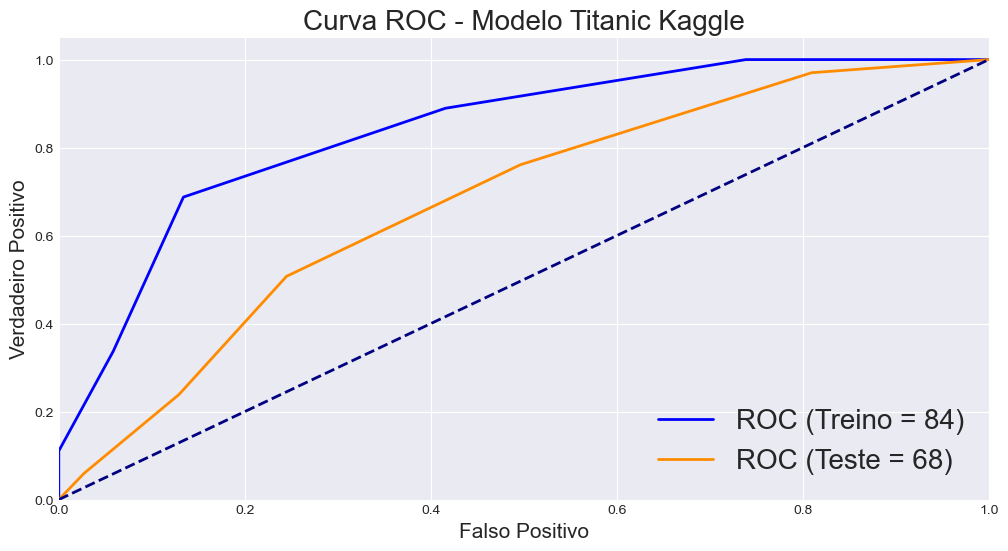

Acurácia, Gini e Área Curva ROC (Base de Treino):  79.16 68.0 84.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  67.76 36.0 68.0


In [240]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_knn_train = round(accuracy_score(y_pred_knn_train, y_train) * 100, 2)

#Teste
acc_knn_test = round(accuracy_score(y_pred_knn_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_knn_train, tpr_knn_train, thresholds = roc_curve(y_train, y_score_knn_train)
roc_auc_knn_train = 100*round(auc(fpr_knn_train, tpr_knn_train), 2)
gini_knn_train = 100*round((2*roc_auc_knn_train/100 - 1), 2)

# Teste
fpr_knn_test, tpr_knn_test, thresholds = roc_curve(y_test, y_score_knn_test)
roc_auc_knn_test = 100*round(auc(fpr_knn_test, tpr_knn_test), 2)
gini_knn_test = 100*round((2*roc_auc_knn_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_knn_train, tpr_knn_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_knn_train)
plt.plot(fpr_knn_test, tpr_knn_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_knn_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_knn_train, gini_knn_train, roc_auc_knn_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_knn_test, gini_knn_test, roc_auc_knn_test)

## Modelo 8) Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [241]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/neuronio.png", width=500, height=500)

In [242]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/perceptron.png", width=600, height=600)

In [243]:
# Perceptron
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

perceptron = Perceptron(penalty='l1', 
                        alpha=0.01,
                        fit_intercept=True,
                        max_iter=1000,
                        tol=0.001, 
                        shuffle=True,
                        verbose=0, 
                        eta0=1.0,
                        n_jobs=-1, 
                        random_state=0, 
                        early_stopping=False, 
                        validation_fraction=0.2,
                        n_iter_no_change=5, 
                        class_weight=None,
                        warm_start=False)

perceptron.fit(x_train, y_train)


clf_isotonic = CalibratedClassifierCV(perceptron, cv=5, method='isotonic')
clf_isotonic.fit(x_train, y_train)

# Treino
y_pred_perceptron_train = perceptron.predict(x_train)
y_score_perceptron_train = clf_isotonic.predict_proba(x_train)[:,1]
#Converte para probabilidade
#y_score_perceptron_train = 1/(1+np.exp(-perceptron.decision_function(x_train)))
#y_score_perceptron_train = perceptron.decision_function(x_train)

# Teste
y_pred_perceptron_test = perceptron.predict(x_test)
y_score_perceptron_test = clf_isotonic.predict_proba(x_test)[:,1]
#Converte para probabilidade
#y_score_perceptron_test = 1/(1+np.exp(-perceptron.decision_function(x_test)))
#y_score_perceptron_test =perceptron.decision_function(x_test)

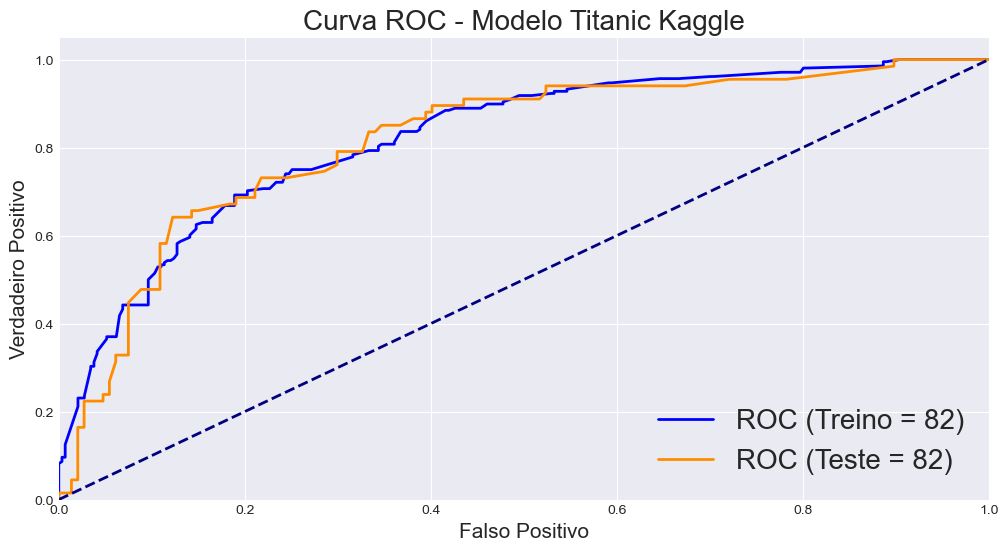

Acurácia, Gini e Área Curva ROC (Base de Treino):  41.68 64.0 82.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  31.31 64.0 82.0


In [244]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_perceptron_train = round(accuracy_score(y_pred_perceptron_train, y_train) * 100, 2)

#Teste
acc_perceptron_test = round(accuracy_score(y_pred_perceptron_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_perceptron_train, tpr_perceptron_train, thresholds = roc_curve(y_train, y_score_perceptron_train)
roc_auc_perceptron_train = 100*round(auc(fpr_perceptron_train, tpr_perceptron_train), 2)
gini_perceptron_train = 100*round((2*roc_auc_perceptron_train/100 - 1), 2)

# Teste
fpr_perceptron_test, tpr_perceptron_test, thresholds = roc_curve(y_test, y_score_perceptron_test)
roc_auc_perceptron_test = 100*round(auc(fpr_perceptron_test, tpr_perceptron_test), 2)
gini_perceptron_test = 100*round((2*roc_auc_perceptron_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_perceptron_train, tpr_perceptron_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_perceptron_train)
plt.plot(fpr_perceptron_test, tpr_perceptron_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_perceptron_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_perceptron_train, gini_perceptron_train, roc_auc_perceptron_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_perceptron_test, gini_perceptron_test, roc_auc_perceptron_test)

## Modelo 09) Rede Neural (Multi-layer Perceptron classifier - MLP)
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle%C2%AEDataset=reg-plane&learningRate=0.03%C2%AEularizationRate=0&noise=0&networkShape=4,2&seed=0.87421&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [245]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/mlp.jpg", width=600, height=600)

In [246]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/backpropagation.jpg", width=900, height=900)

In [247]:
# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(400, ),
                    activation='logistic', 
                    solver='adam', 
                    alpha=0.01, 
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    power_t=0.5, 
                    max_iter=500, 
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True,
                    early_stopping=False, 
                    validation_fraction=0.2, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08,
                    n_iter_no_change=10)


mlp.fit(x_train, y_train)

# Treino
y_pred_mlp_train = mlp.predict(x_train)
y_score_mlp_train = mlp.predict_proba(x_train)[:,1]

# Teste
y_pred_mlp_test = mlp.predict(x_test)
y_score_mlp_test = mlp.predict_proba(x_test)[:,1]

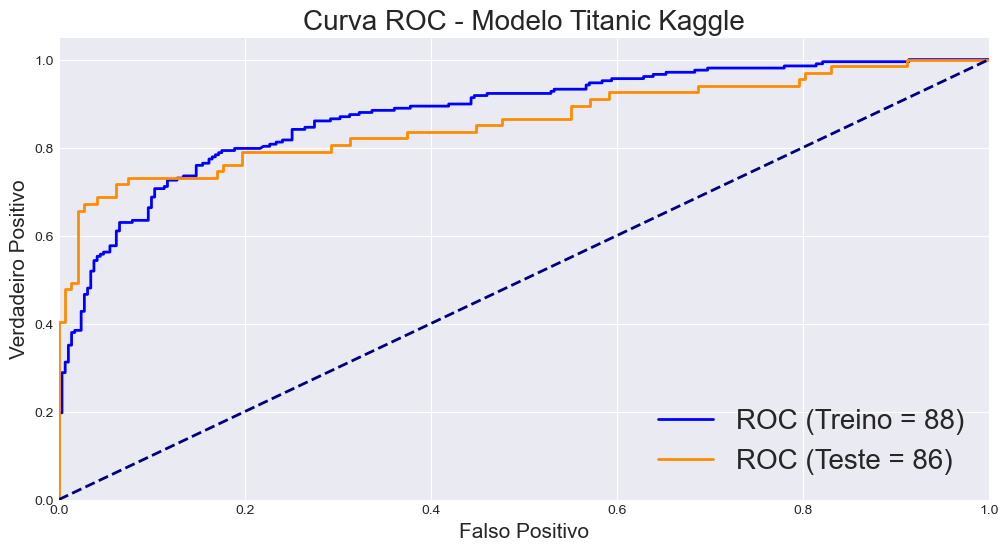

Acurácia, Gini e Área Curva ROC (Base de Treino):  79.56 76.0 88.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  86.45 72.0 86.0


In [248]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_mlp_train = round(accuracy_score(y_pred_mlp_train, y_train) * 100, 2)

#Teste
acc_mlp_test = round(accuracy_score(y_pred_mlp_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_mlp_train, tpr_mlp_train, thresholds = roc_curve(y_train, y_score_mlp_train)
roc_auc_mlp_train = 100*round(auc(fpr_mlp_train, tpr_mlp_train), 2)
gini_mlp_train = 100*round((2*roc_auc_mlp_train/100 - 1), 2)

# Teste
fpr_mlp_test, tpr_mlp_test, thresholds = roc_curve(y_test, y_score_mlp_test)
roc_auc_mlp_test = 100*round(auc(fpr_mlp_test, tpr_mlp_test), 2)
gini_mlp_test = 100*round((2*roc_auc_mlp_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_mlp_train, tpr_mlp_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_mlp_train)
plt.plot(fpr_mlp_test, tpr_mlp_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_mlp_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_mlp_train, gini_mlp_train, roc_auc_mlp_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_mlp_test, gini_mlp_test, roc_auc_mlp_test)

## Modelo 10) Composição de Modelos (Stacking)
Compondo tabela de modelagem com Scores oriundos de todas tecnicas utilizadas até o momento

In [249]:
stack_df_train = pd.DataFrame({'GAUSSIAN':y_score_gaussian_train[:,1], 
                        'LOGREG': y_score_logreg_train[:,1],
                        'SVM': y_score_svc_train,
                        'TREE': y_score_dectree_train,
                        'RFOREST': y_score_rndforest_train,
                        'GBM': y_score_gbc_train,
                        'KNN': y_score_knn_train,
                        'PERCT': y_score_perceptron_train,
                        'MLP': y_score_mlp_train,
                        'TARGET':y_train
                       })

stack_df_test = pd.DataFrame({'GAUSSIAN':y_score_gaussian_test[:,1], 
                        'LOGREG': y_score_logreg_test[:,1],
                        'SVM': y_score_svc_test,
                        'TREE': y_score_dectree_test,
                        'RFOREST': y_score_rndforest_test,
                        'GBM': y_score_gbc_test,
                        'KNN': y_score_knn_test,
                        'PERCT': y_score_perceptron_test,
                        'MLP': y_score_mlp_test,
                        'TARGET':y_test
                       })

In [250]:
stack_df_train.head()

,GAUSSIAN,LOGREG,SVM,TREE,RFOREST,GBM,KNN,PERCT,MLP,TARGET
159,0.007867,0.171331,0.250999,0.146939,0.234503,0.191906,0.2,0.279307,0.159611,1
351,0.001872,0.127810,0.250328,0.146939,0.174428,0.131806,0.2,0.262641,0.104975,1
78,0.001786,0.110868,0.256426,0.146939,0.174428,0.089064,0.2,0.238542,0.067149,0
92,0.071049,0.553728,0.490087,0.146939,0.382934,0.887814,0.8,0.453448,0.858432,1
493,0.137905,0.815633,0.413990,0.946809,0.730550,0.904786,0.4,0.509848,0.807110,1


In [251]:
stack_df_train['STACK01'] = (stack_df_train['GAUSSIAN']+ \
                      stack_df_train['LOGREG'] + \
                      stack_df_train['SVM'] + \
                      stack_df_train['TREE'] + \
                      stack_df_train['RFOREST'] + \
                      stack_df_train['GBM'] + \
                      stack_df_train['KNN'] + \
                      stack_df_train['PERCT'] + \
                      stack_df_train['MLP'])/9

stack_df_train.head()

,GAUSSIAN,LOGREG,SVM,TREE,RFOREST,GBM,KNN,PERCT,MLP,TARGET,STACK01
159,0.007867,0.171331,0.250999,0.146939,0.234503,0.191906,0.2,0.279307,0.159611,1,0.182496
351,0.001872,0.127810,0.250328,0.146939,0.174428,0.131806,0.2,0.262641,0.104975,1,0.155644
78,0.001786,0.110868,0.256426,0.146939,0.174428,0.089064,0.2,0.238542,0.067149,0,0.142800
92,0.071049,0.553728,0.490087,0.146939,0.382934,0.887814,0.8,0.453448,0.858432,1,0.516048
493,0.137905,0.815633,0.413990,0.946809,0.730550,0.904786,0.4,0.509848,0.807110,1,0.629626


In [252]:
stack_df_test['STACK01'] = (stack_df_test['GAUSSIAN']+ \
                      stack_df_test['LOGREG'] + \
                      stack_df_test['SVM'] + \
                      stack_df_test['TREE'] + \
                      stack_df_test['RFOREST'] + \
                      stack_df_test['GBM'] + \
                      stack_df_test['KNN'] + \
                      stack_df_test['PERCT'] + \
                      stack_df_test['MLP'])/9

stack_df_test.head()

,GAUSSIAN,LOGREG,SVM,TREE,RFOREST,GBM,KNN,PERCT,MLP,TARGET,STACK01
338,0.146095,0.835369,0.386234,0.946809,0.753306,0.982303,0.2,0.540436,0.710225,1,0.611197
142,0.002598,0.177743,0.302713,0.146939,0.219452,0.098319,0.0,0.260010,0.093340,0,0.144568
242,0.167924,0.696481,0.252132,0.652174,0.423021,0.783859,0.2,0.368263,0.621130,1,0.462776
235,0.004174,0.207501,0.341444,0.146939,0.276922,0.077082,0.6,0.359582,0.146044,1,0.239965
468,0.001864,0.119953,0.260073,0.146939,0.174428,0.075419,0.4,0.243272,0.066634,1,0.165398


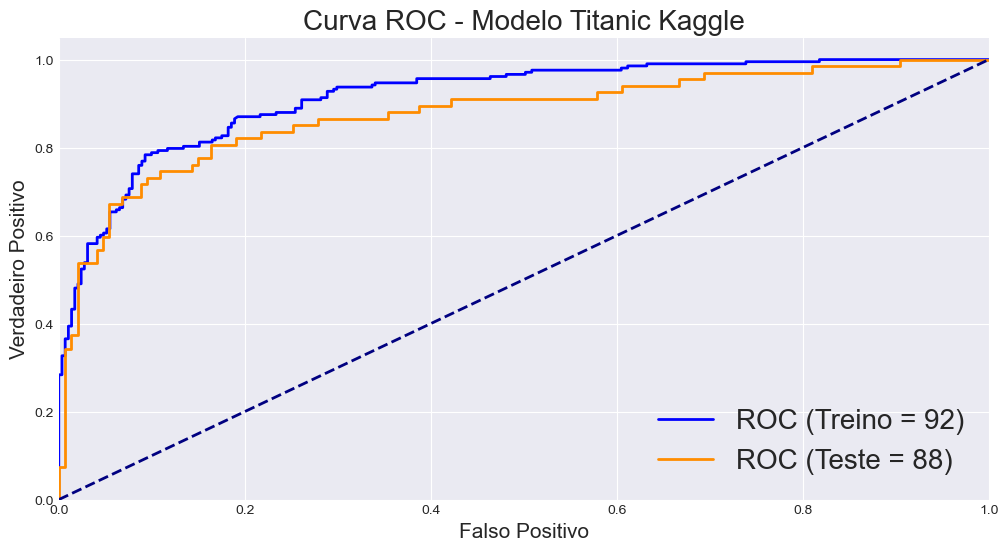

Gini e Área Curva ROC (Base de Treino):  84.0 92.0
Gini e Área Curva ROC (Base de Teste):  76.0 88.0


In [253]:
# 1) Cálculo da acurácia
#from sklearn.metrics import accuracy_score

#Treino
#acc_stk_train = round(accuracy_score(y_pred_stk_train, y_train) * 100, 2)

#Teste
#acc_stk_test = round(accuracy_score(y_pred_stk_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_stk_train, tpr_stk_train, thresholds = roc_curve(y_train, stack_df_train.STACK01.values)
roc_auc_stk_train = 100*round(auc(fpr_stk_train, tpr_stk_train), 2)
gini_stk_train = 100*round((2*roc_auc_stk_train/100 - 1), 2)

# Teste
fpr_stk_test, tpr_stk_test, thresholds = roc_curve(y_test, stack_df_test.STACK01.values)
roc_auc_stk_test = 100*round(auc(fpr_stk_test, tpr_stk_test), 2)
gini_stk_test = 100*round((2*roc_auc_stk_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_stk_train, tpr_stk_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_stk_train)
plt.plot(fpr_stk_test, tpr_stk_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_stk_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Gini e Área Curva ROC (Base de Treino): ', gini_stk_train, roc_auc_stk_train)
print('Gini e Área Curva ROC (Base de Teste): ', gini_stk_test, roc_auc_stk_test)

## Blending de Modelos

In [254]:
x_train = stack_df_train.drop(['TARGET'],axis=1)
x_test = stack_df_test.drop(['TARGET'],axis=1)

y_train = stack_df_train.TARGET.values
y_test = stack_df_test.TARGET.values

In [255]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


blend = RandomForestClassifier(n_estimators=100, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=0.1, 
                                   min_samples_leaf=0.01, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0,  
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=-1, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)

blend.fit(x_train, y_train)

# Treino
y_pred_blend_train = blend.predict(x_train)
y_score_blend_train = blend.predict_proba(x_train)[:,1]

# Teste
y_pred_blend_test = blend.predict(x_test)
y_score_blend_test = blend.predict_proba(x_test)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


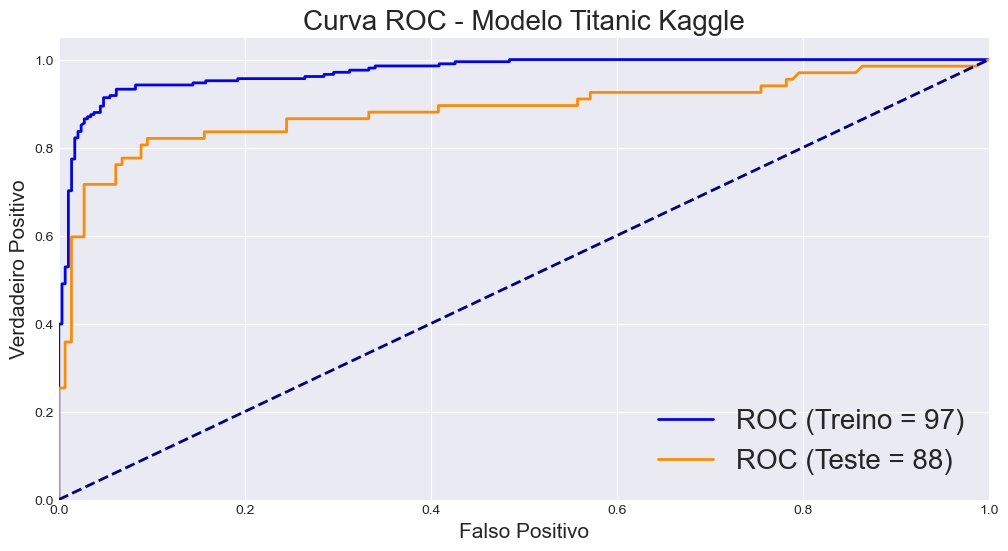

Acurácia, Gini e Área Curva ROC (Base de Treino):  92.59 94.0 97.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  87.38 76.0 88.0


In [256]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_blend_train = round(accuracy_score(y_pred_blend_train, y_train) * 100, 2)

#Teste
acc_blend_test = round(accuracy_score(y_pred_blend_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_blend_train, tpr_blend_train, thresholds = roc_curve(y_train, y_score_blend_train)
roc_auc_blend_train = 100*round(auc(fpr_blend_train, tpr_blend_train), 2)
gini_blend_train = 100*round((2*roc_auc_blend_train/100 - 1), 2)

# Teste
fpr_blend_test, tpr_blend_test, thresholds = roc_curve(y_test, y_score_blend_test)
roc_auc_blend_test = 100*round(auc(fpr_blend_test, tpr_blend_test), 2)
gini_blend_test = 100*round((2*roc_auc_blend_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_blend_train, tpr_blend_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_blend_train)
plt.plot(fpr_blend_test, tpr_blend_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_blend_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_blend_train, gini_blend_train, roc_auc_blend_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_blend_test, gini_blend_test, roc_auc_blend_test)

# Comparando todos Modelos

In [257]:
models = pd.DataFrame({
    'Modelo': ['Naive Bayes', 
              'Regressão Logística',
              'Support Vector Machines',
              'Decision Tree', 
              'Random Forest', 
              'Gradient Boosting', 
              'k-Nearest Neighbors', 
              'Perceptron', 
              'Rede Neural (MLP)',
              'STACKING',
              'BLENDING'              
              ],
    
     'Gini_Treino': [gini_gaussian_train,
                    gini_logreg_train,
                    gini_svc_train,
                    gini_dectree_train,
                    gini_rndforest_train,
                    gini_gbc_train,
                    gini_knn_train,
                    gini_perceptron_train,
                    gini_mlp_train,
                    gini_stk_train,
                    gini_blend_train],   
    
    
    'Gini_Teste': [gini_gaussian_test,
                    gini_logreg_test,
                    gini_svc_test,
                    gini_dectree_test,
                    gini_rndforest_test,
                    gini_gbc_test,
                    gini_knn_test,
                    gini_perceptron_test,
                    gini_mlp_test,
                    gini_stk_test,
                    gini_blend_test]

})
models['Delta'] = models['Gini_Treino'] - models['Gini_Teste']
model_comp = models.sort_values(by='Gini_Teste', ascending=False)
model_comp = model_comp[['Modelo','Gini_Treino','Gini_Teste','Delta']]


model_comp

,Modelo,Gini_Treino,Gini_Teste,Delta
4,Random Forest,74.0,78.0,-4.0
9,STACKING,84.0,76.0,8.0
10,BLENDING,94.0,76.0,18.0
5,Gradient Boosting,96.0,74.0,22.0
1,Regressão Logística,70.0,72.0,-2.0
3,Decision Tree,72.0,72.0,0.0
8,Rede Neural (MLP),76.0,72.0,4.0
7,Perceptron,64.0,64.0,0.0
0,Naive Bayes,62.0,60.0,2.0
6,k-Nearest Neighbors,68.0,36.0,32.0
